# The discrete Fourier transform (DFT)

TMA4135 Autumn 2023


Load some useful packages and functions:


In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [15, 5]

## Example: low-pass filters

The unfiltered data is sampled from the function
\begin{align*}
f(t) = \mathrm{sin}^3 (2\pi t) + \mathrm{cos}\left(6\pi t\right)\mathrm{cos}\left(12\pi t\right)\mathrm{sin}\left(6\pi t\right) .
\end{align*}
The idea is to compute the discrete Fourier transform, "filter out" all frequencies above the cut-off frequency $k\_{\mathrm{cut}}=8 $ Hz, then compute a filtered signal through the inverse transform:


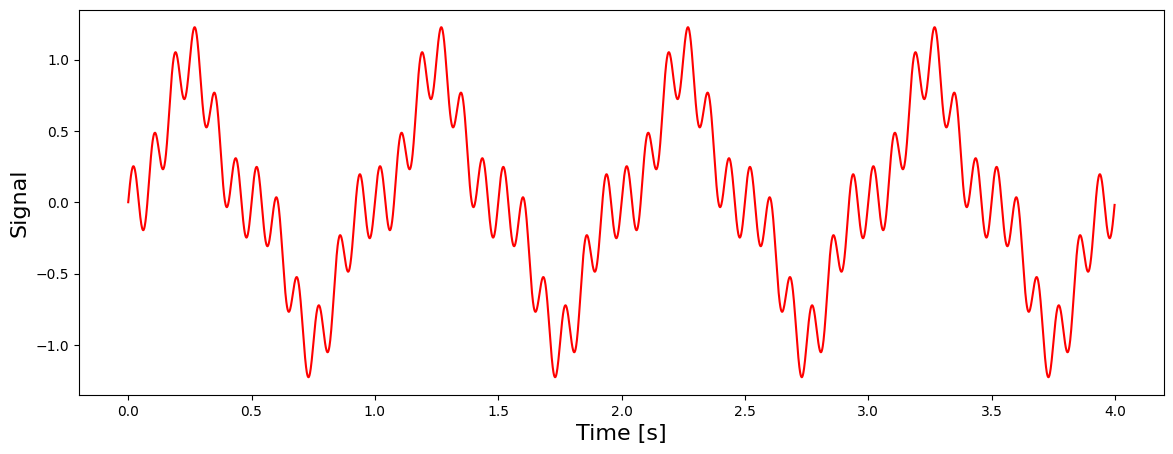

In [3]:
# INPUT DATA
dt = 0.001  # temporal resolution [s]
t = np.arange(0, 4, dt)  # array with time instants, over 4 seconds
signal = np.sin(2 * np.pi * t) ** 3 + np.sin(3 * 2 * np.pi * t) * np.cos(
    3 * 2 * np.pi * t
) * np.cos(6 * 2 * np.pi * t)

# Plot original signal
plt.figure(figsize=(14, 5))
plt.plot(t, signal, "r", label="Original signal")
plt.ylabel("Signal", fontsize=16)
plt.xlabel("Time [s]", fontsize=16)
plt.show()

We will now compute the discrete Fourier transform and plot the spectrum:


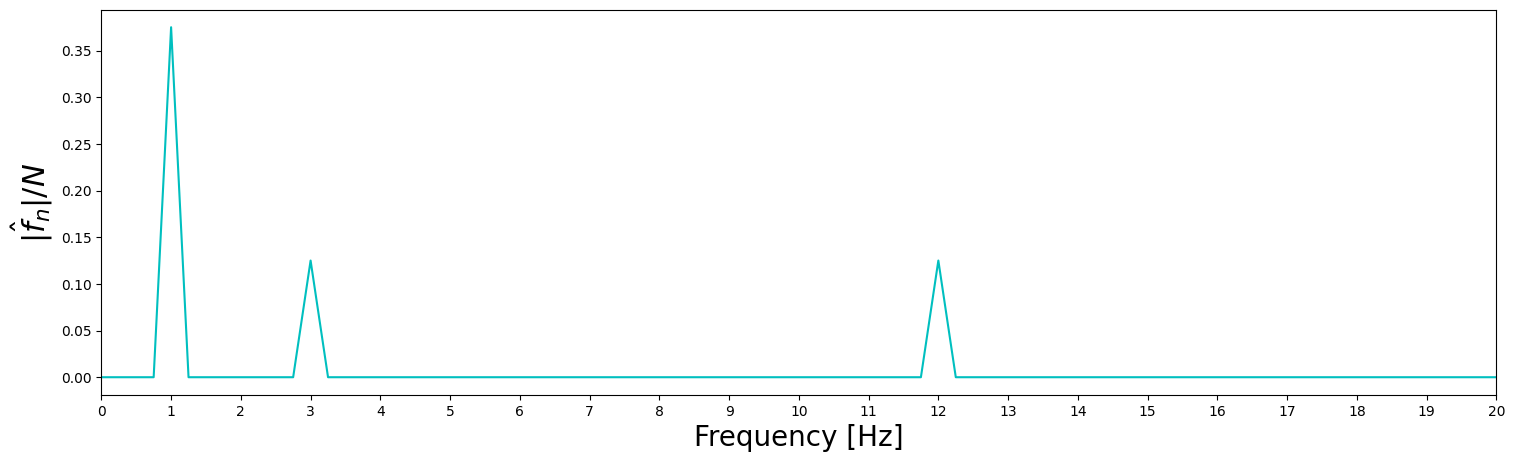

In [25]:
# Compute the DFT of the signal
fHat = np.fft.fft(signal)  # Compute the DFT of the original signal
N = fHat.size  # Number of data points
freq = (1 / (dt * N)) * np.arange(N)

# Plot the frequency spectrum
plt.figure(figsize=(18, 5))
L = np.arange(0, np.floor(N / 2), dtype="int")
plt.plot(freq[L], np.abs(fHat[L]) / N, "c-")
plt.xlabel("Frequency [Hz]", fontsize=20)
plt.ylabel(r"$|\hat{f}_n|/N$", fontsize=22)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 20.5, 1))
plt.show()

We can cut out all frequencies above $k_{\mathrm{cut}}$ and perform the inverse transform to compute the filtered signal:


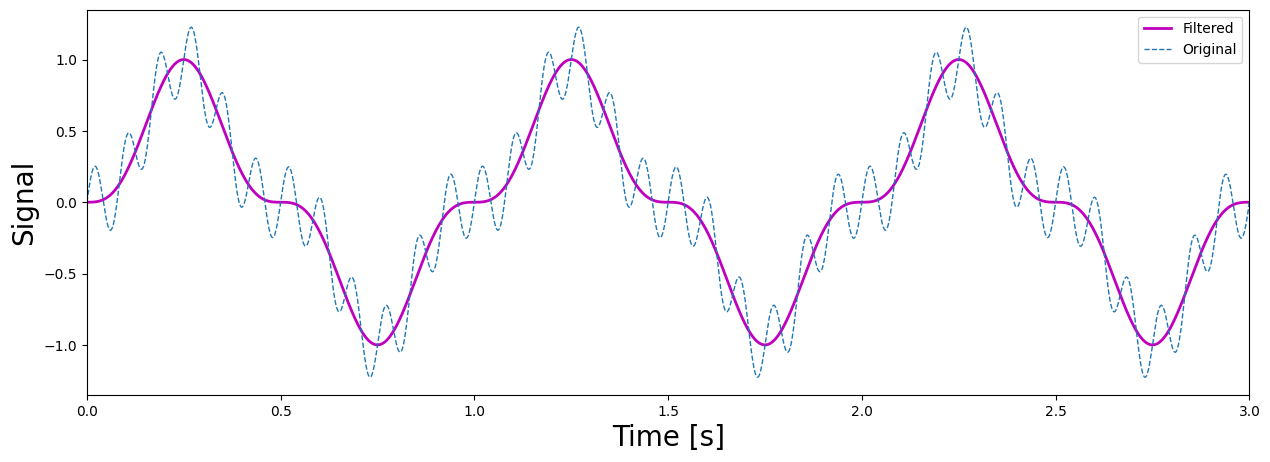

In [5]:
# Set a cut-off frequency in the interval ]5,10[ Hz
kCut = 8  # cut-off frequency [Hz]

# Cut higher frequencies than kCur (filter signal)
lowpass_DFT = fHat  # copy the original DFT
sample_freq = np.fft.fftfreq(signal.size, d=dt)
lowpass_DFT[np.abs(sample_freq) > kCut] = 0

filtered_signal = np.fft.ifft(lowpass_DFT)

# Plot original and filtered signals
plt.plot(t, filtered_signal.real, "m", linewidth=2, label="Filtered")
plt.plot(t, signal, "--", label="Original", linewidth=1)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.legend(loc="best")
plt.xlim([0, 3])
plt.show()

In [6]:
# 1a
def fourier_matrix(N: int) -> np.ndarray:
    # return np.fft.fft(np.eye(N))
    F = np.zeros((N, N), dtype="complex")

    for i in range(N):
        for j in range(N):
            F[i, j] = np.exp(-2j * np.pi * i * j / N)

    return F


print(np.round(fourier_matrix(4)))

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


In [27]:
# 1b
f_data = np.array([3, 2, -1, 1, -1, 2, 0, 3, 1, -2])
print(np.round(fourier_matrix(len(f_data)).dot(f_data), 3))

[ 8.   +0.j     0.573+2.041j  1.455-4.755j  3.927-5.204j  7.045-2.939j
 -4.   -0.j     7.045+2.939j  3.927+5.204j  1.455+4.755j  0.573-2.041j]


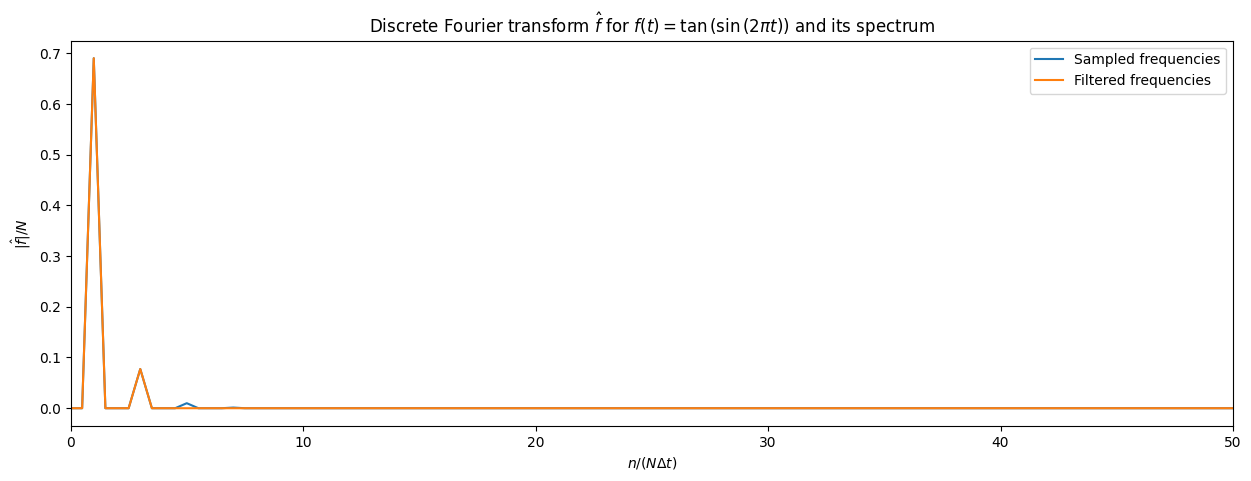

In [48]:
# 1c
def f(t: np.ndarray) -> np.ndarray:
    return np.tan(np.sin(2 * np.pi * t))


a = 0.0
b = 2.0
delta_t = 0.01
x_values = np.linspace(a, b, int((b - a) / delta_t), endpoint=False)
sample_data = f(x_values)

N = len(x_values)
F_N = fourier_matrix(N)

f_hat = F_N.dot(sample_data)
spectrum = abs(f_hat) / N

significant_frequencies = spectrum >= 0.05
factor = 100 / (N * delta_t)
scaled_x_values = x_values * factor

plt.xlim([a, factor])
plt.plot(scaled_x_values, spectrum, label="Sampled frequencies")
plt.plot(
    scaled_x_values,
    spectrum * significant_frequencies,
    label="Filtered frequencies",
)
plt.ylabel(r"$\vert\hat{f}\vert /N$")
plt.xlabel(r"$n/(N \Delta t)$")
plt.title(
    r"Discrete Fourier transform $\hat{f}$ for $f(t)=\tan{(\sin{(2 \pi t)})}$ "
    "and its spectrum"
)
plt.legend()
plt.show()

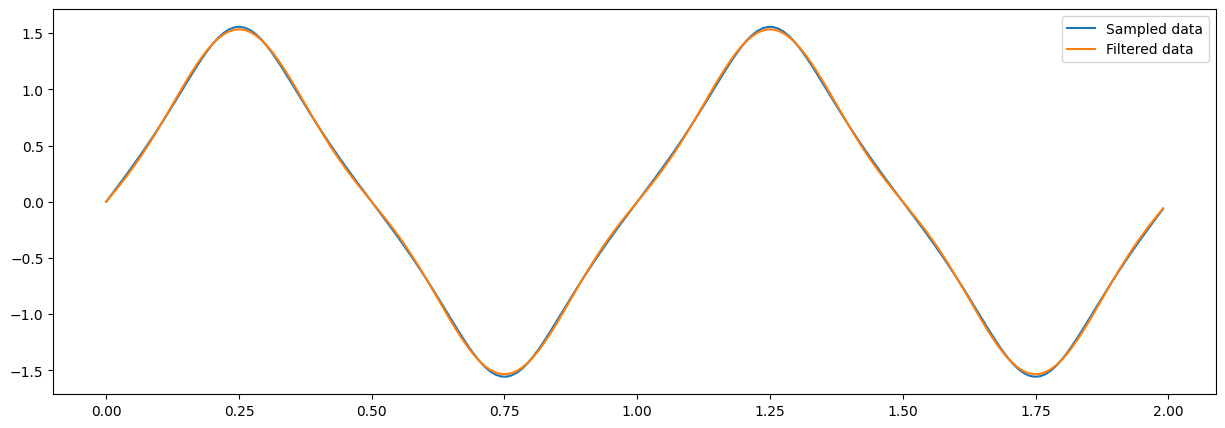

In [41]:
# 1d
filter_data = np.conjugate(F_N).dot(f_hat * significant_frequencies) / N

plt.plot(x_values, sample_data, label="Sampled data")
plt.plot(x_values, filter_data.real, label="Filtered data")
plt.legend()
plt.show()